# Inspecting the King County House Sales Data Set

Importing Libraries and the Data Set

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import folium as os # for plotting maps
import statsmodels.api as sm
from statsmodels.formula.api import ols# for linear regression models

In [4]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


-----
# Cleaning the Data set

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

##### notes:
1. 'waterfront' is using 0 to represent no view and 1 to represent water front view
2. 'bathroom' is in float type
3. 'condition' is a number from 1-5 from bad to good? or good to bad?
4. 'grade' is a range from 3-13
5. 'date' is in d/m/y need to change to y/m/d
6. 'waterfront', 'view', 'yr_renovated' has missing values
7. repeated id's in 'id' column, meaning that same house sold more then once

In [6]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Cleaning the Data

In [7]:
df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [8]:
df['view'].value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [9]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [10]:
#Choose to fill with median because for all three columns the most common value is 0
df.waterfront = df.waterfront.fillna(df.waterfront.median())
df.view = df.view.fillna(df.view.median())
df.yr_renovated = df.yr_renovated.fillna(df.yr_renovated.median())

In [11]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

some of the entries in sqft_basement are '?' which is a string value and will interfere with any descriptive statistics we try to apply

In [12]:
df['sqft_basement']=df['sqft_basement'].replace('?', np.NAN)
df['sqft_basement'].value_counts()
df['sqft_basement'].dropna(inplace=True)

In [13]:
df.isna().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement    454
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
dtype: int64

###### Changing the dtype of date column and making the format from d/m/y to  y/m/d format

In [14]:
df['date'].dtype
df['date'] = pd.to_datetime(df['date'])
print(df['date'].dtype)
df['date'].head()

datetime64[ns]


0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

 -----------
# Statistical Anaylsis


In [15]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


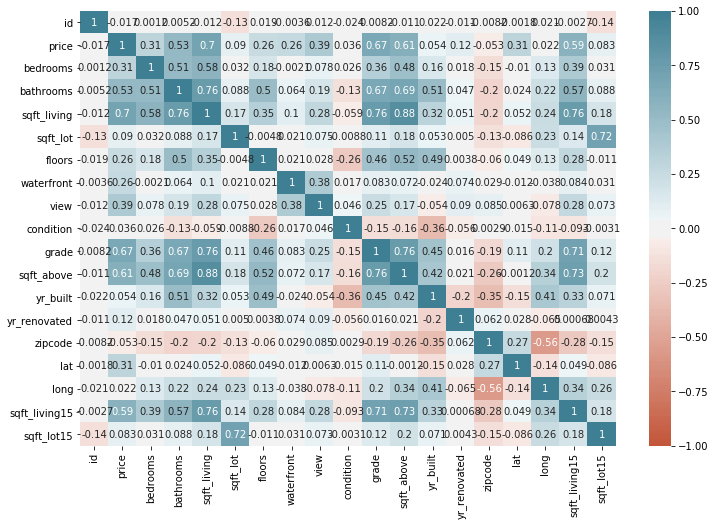

In [18]:
# correlation heatmap between every column
correlation = df.corr()
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap=sns.diverging_palette(20, 220, n=200))

In [19]:
df.price.describe().round(-3)

count      22000.0
mean      540000.0
std       367000.0
min        78000.0
25%       322000.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64

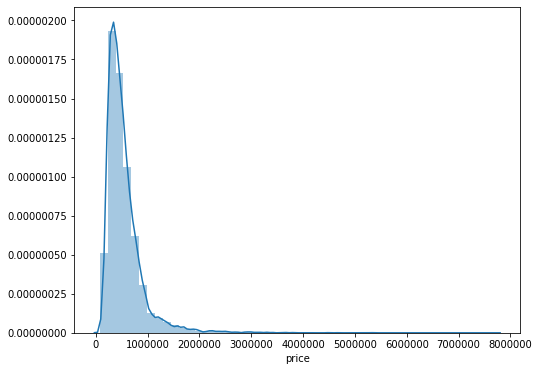

In [22]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.distplot(df['price'])

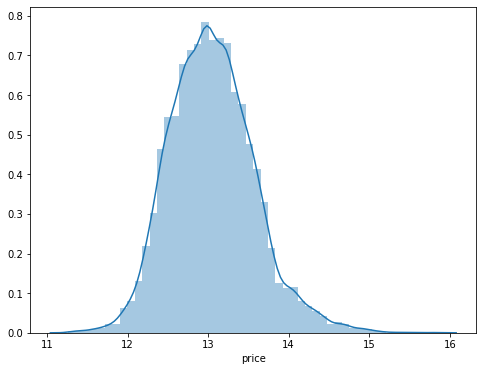

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
sns.distplot(np.log(df['price']))
#just the price distplot in a normalized form to make the skew more centered

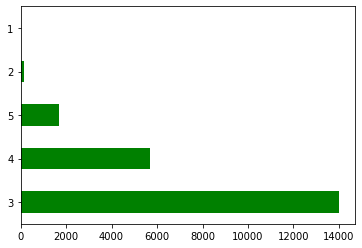

In [18]:
# we can see the number of times a condition appears. 5 being excellent and 1 being unaccaptable.
df.condition.value_counts().plot(kind='barh', color='green')

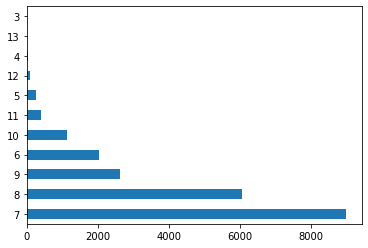

In [19]:
df.grade.value_counts().plot(kind='barh')
# grade ratings betwen 7 and 8 seems to be the average

In [83]:
# inspecting the data side by side
size_price = df.loc[:, ['price','sqft_living', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]
size_price.head()

,price,sqft_living,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,1180,0.0,1340,5650
1,538000.0,2570,400.0,1690,7639
2,180000.0,770,0.0,2720,8062
3,604000.0,1960,910.0,1360,5000
4,510000.0,1680,0.0,1800,7503


------
# Questions

#### Q1. price of houses in zipcodes
#### Q2. number of houses sold in zipcodes
#### Q3. what variables effect the price most



# Q1.  Which price are the most houses being sold and bought at and which price range has most activity and demand

In [24]:
#we can see the basic statistical info of price column.
df.price.describe().round(-3)

count      22000.0
mean      540000.0
std       367000.0
min        78000.0
25%       322000.0
50%       450000.0
75%       645000.0
max      7700000.0
Name: price, dtype: float64

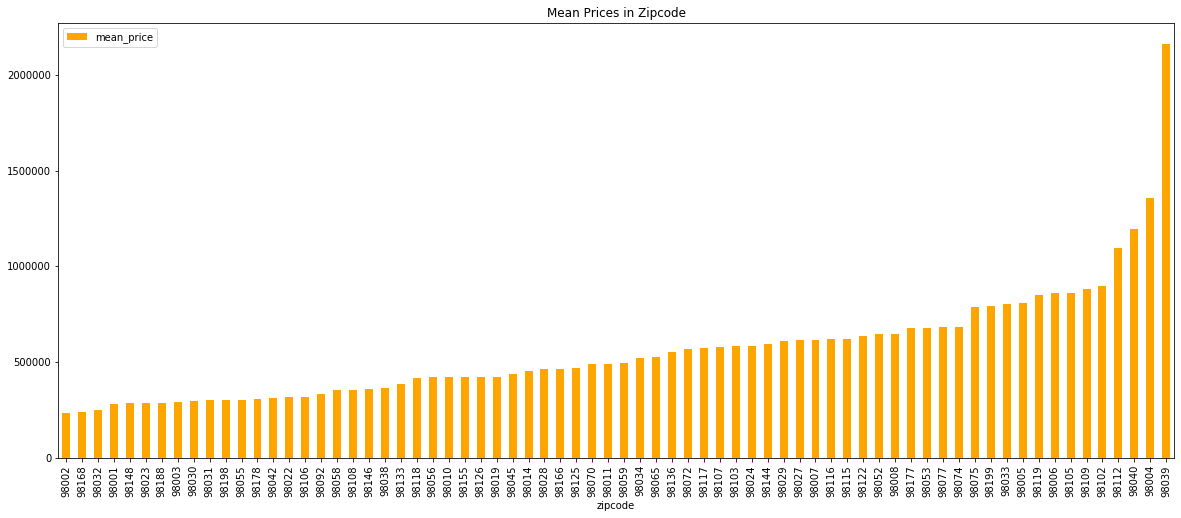

In [25]:
# Mean Price by Zipcode
df.groupby('zipcode').agg(mean_price= ('price', 'mean'))\
.sort_values('mean_price').plot(kind='bar', figsize=(20,8), color='orange', title='Mean Prices in Zipcode')

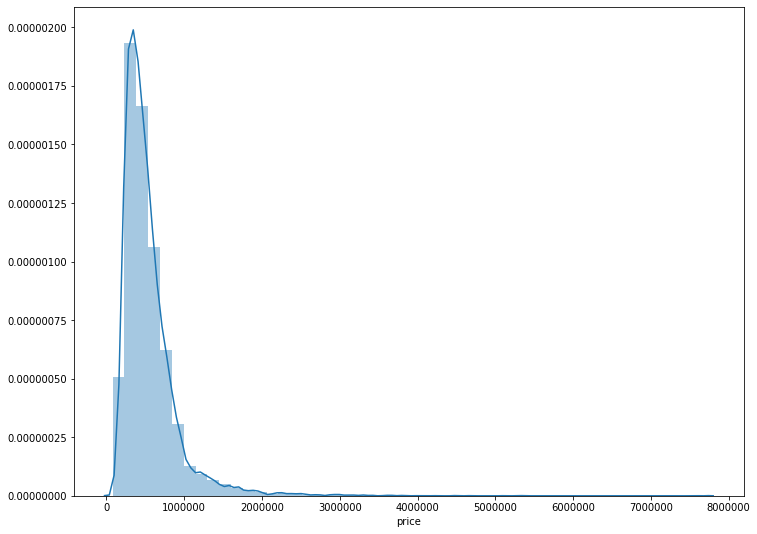

In [26]:
#making a distplot for price column to see what the distribution of prices for houses sold looks like
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
sns.distplot(df['price'])

from the above we can see that most of the house prices center around 600k.we can also see that most houses sold are under 1m so if we are to show more price bands with smaller ranges it will show us a more accurate trend. i will create price bands, for this.
so i will have 11 bands
##### Price Bands will be:

11 --> 2m+

10 --> 1m+

 9--> 800-999k 
 
 8-->700-800k
 
 7-->600-700k
 
 6-->500-600k
 
 5-->400-500k
 
 4-->300-400k
 
 3-->200-300k
 
 2-->100-200k
 
 1-->under 100k

then i will add it as a new column so that i can clearly see the number of houses sold in each band


In [27]:
# create a new column which puts the prices into range bands so that we can compare them and make it less cluttered.
price_list = df['price']
df['price_bands'] = df['price']
tier_arr = []
for idx, price in enumerate(price_list):
    if price >= 2000000:
        tier_arr.append(11)
    elif price >= 1000000:
        tier_arr.append(10)
    elif price >= 800000:
        tier_arr.append(9)
    elif price >= 700000 :
        tier_arr.append(8)
    elif price >= 600000 :
        tier_arr.append(7)
    elif price >= 500000 :
        tier_arr.append(6)
    elif price >= 400000:
        tier_arr.append(5)
    elif price >= 300000:
        tier_arr.append(4)
    elif price >= 200000:
        tier_arr.append(3)
    elif price >= 100000:
        tier_arr.append(2)
    else:
        tier_arr.append(1)   
        
# create a new column that will assign the price band to each house sold.
df['price_bands'] = tier_arr
df.price_bands.head()

0    3
1    6
2    2
3    7
4    6
Name: price_bands, dtype: int64

In [28]:
# inspecting the data side by side, we can see that every house sold has a new column which categorises them based on price
size_price = df.loc[:, ['price','price_bands','sqft_living', 'sqft_basement', 'sqft_living15', 'sqft_lot15']]
size_price.head()

,price,price_bands,sqft_living,sqft_basement,sqft_living15,sqft_lot15
0,221900.0,3,1180,0.0,1340,5650
1,538000.0,6,2570,400.0,1690,7639
2,180000.0,2,770,0.0,2720,8062
3,604000.0,7,1960,910.0,1360,5000
4,510000.0,6,1680,0.0,1800,7503


In [89]:
# we can see for the most part that prices are evenly spread except for the few ourliers under 100k and over 2m in price
df.price_bands.value_counts(sort=False)

1       24
2      759
3     3645
4     4253
5     3713
6     2839
7     1954
8     1410
9     1510
10    1282
11     208
Name: price_bands, dtype: int64

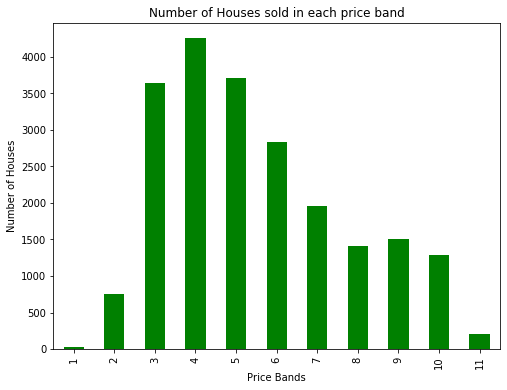

In [90]:
df.price_bands.value_counts(sort=False).plot(kind='bar',
                                             title= 'Number of Houses sold in each price band',
                                             figsize=(8,6),
                                             color='green')
plt.xlabel('Price Bands')
plt.ylabel('Number of Houses');
#box and whiskers for how many zipcode fall in each price_band and then show the lat and long for each zipcode

from this we can infer that due to the high amount of houses sold in price bands 3-6 it may be more profitable to focus 
your company resources in this price bands as it may eludes to higher demand in that price bands, as well as more activity and houses being sold/bought in those price bands.

In [96]:
#Majority of Houses sold in this price band
price_band_4 = df[df['price_bands'] == 4]['price_bands'].count()
print(price_band_4)
percentage_portion = round(price_band_4/len(df['price_bands']) * 100,2)
print('percentage of our Data set in this price band:', percentage_portion, "%")

4253
percentage of our Data set in this price band: 19.69 %


In [97]:
price_band_3_to_6 = df.loc[(df['price_bands'] <= 6) 
       & (df['price_bands'] >=3) , 'price_bands'].count()

print(price_band_3_to_6)

percentage_portion = round(price_band_3_to_6/len(df) * 100,2)
print('percentage of our Data set in this price band:', percentage_portion, "%")

14450
percentage of our Data set in this price band: 66.91 %


we can see that more then 65% of our sold houses in our data set falls between price band 3-6 

-----
# Q2. which location/zipcode has most demand?
House Demands in each zipcode
* we will see the distribution of the price of houses based on location
* see how the price_bands of houses are distributed by location
* how many houses are sold in each zipcode
* give you descriptive statistics of each zipcode 
* suggest which zipcode fits the most active price_band
### Plotting long and lat on a map.


In [98]:
# df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="price",
#              cmap="gist_heat_r", colorbar=True, sharex=False)
# plt.grid(which='both')
# plt.title('Price as per location')
# plt.show()

In [103]:
king_county_img=mpimg.imread('King County.png', img)

NameError: name 'mpimg' is not defined

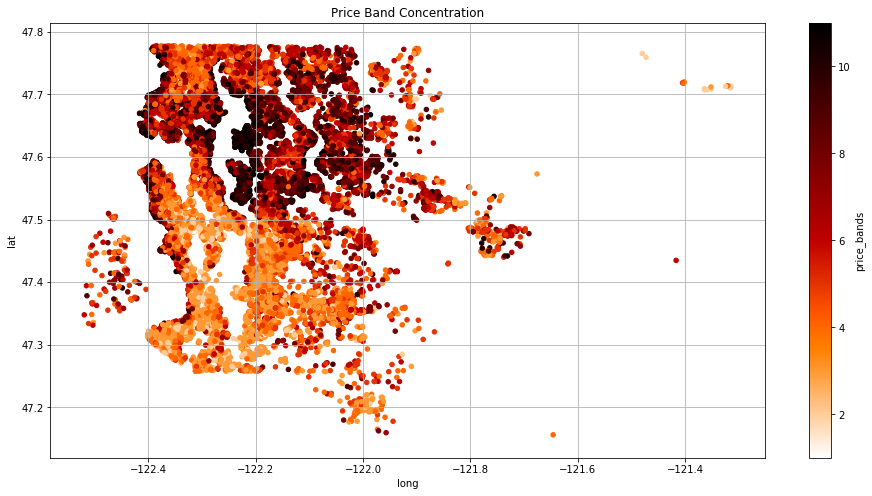

In [93]:
df.plot(kind="scatter", x="long", y="lat", figsize=(16, 8), c="price_bands",
             cmap="gist_heat_r", colorbar=True, sharex=False, )
plt.grid(which='both')
plt.title('Price Band Concentration')
plt.show()
# since we suggestedprice band 3-6 viewing it on a map is a more clear then price range and is less spread

in the heat map we can see that the south tends to be cheaper then the northern parts, which can show us that if we are focusing efforts and resources in price bands between 3-5 then houses in that price band tend to be in the central southern area of Seattle

In [94]:
#created a new variable table which shows id's and zipcode.
zip_id = df.loc[:, ['id', 'zipcode']]
zip_id.head()

,id,zipcode
0,7129300520,98178
1,6414100192,98125
2,5631500400,98028
3,2487200875,98136
4,1954400510,98074


In [96]:
#this duplicate counter will count how many times a zipcode is repeated 
#telling us how many times a house was sold in that zipcode
def dup_counter(data):
    dup_dict = {}
    dup_list = []
    values = sorted(list(map(lambda x: x, data)))
    for val in values:
        if val in dup_dict:
            dup_dict[val] += 1
        else:
            dup_dict[val] = 1
            
    sorted_dup_dict = sorted(dup_dict.items(), key = lambda x: x[1], reverse = True)
    dup_temp = list(sorted_dup_dict)
#dup_dict.items() will return the key, pair value in a tuple.    
    for d in dup_temp:
        dup_list.append(d)
    return dup_list

zipcode_count = dup_counter(zip_id['zipcode'])
print(zipcode_count)


[(98103, 602), (98038, 589), (98115, 583), (98052, 574), (98117, 553), (98042, 547), (98034, 545), (98118, 507), (98023, 499), (98006, 498), (98133, 493), (98059, 468), (98058, 455), (98155, 446), (98074, 441), (98033, 432), (98027, 412), (98125, 409), (98056, 406), (98053, 403), (98001, 361), (98075, 359), (98126, 354), (98092, 351), (98144, 343), (98106, 335), (98116, 330), (98029, 321), (98004, 317), (98199, 317), (98065, 308), (98122, 290), (98146, 288), (98008, 283), (98028, 283), (98040, 282), (98003, 280), (98198, 280), (98031, 273), (98072, 273), (98112, 269), (98168, 269), (98055, 268), (98107, 266), (98136, 263), (98178, 262), (98030, 256), (98177, 255), (98166, 254), (98022, 233), (98105, 229), (98045, 220), (98002, 199), (98077, 198), (98011, 195), (98019, 190), (98108, 186), (98119, 184), (98005, 168), (98007, 141), (98188, 136), (98032, 125), (98014, 124), (98070, 117), (98109, 109), (98102, 104), (98010, 100), (98024, 80), (98148, 57), (98039, 50)]


### What are the median prices of each zipcode and then which zipcodes fall into which price band so we know which ones fall in the price_band 3-6 which i mentioned earlier has the most activity and demand

In [97]:
zip_price_groupby = df.groupby('zipcode')['price'].median()

In [103]:
df_zip_price_groupby= pd.DataFrame(zip_price_groupby)
df_zip_price_groupby

group_price_list = df_zip_price_groupby['price']

df_zip_price_groupby['price_bands'] = df_zip_price_groupby['price']

tier_arr = []
for idx, price in enumerate(group_price_list):
    if price >= 2000000:
        tier_arr.append(11)
    elif price >= 1000000:
        tier_arr.append(10)
    elif price >= 800000:
        tier_arr.append(9)
    elif price >= 700000 :
        tier_arr.append(8)
    elif price >= 600000 :
        tier_arr.append(7)
    elif price >= 500000 :
        tier_arr.append(6)
    elif price >= 400000:
        tier_arr.append(5)
    elif price >= 300000:
        tier_arr.append(4)
    elif price >= 200000:
        tier_arr.append(3)
    elif price >= 100000:
        tier_arr.append(2)
    else:
        tier_arr.append(1)

df_zip_price_groupby['price_bands'] = tier_arr
df_zip_price_groupby = df_zip_price_groupby.reset_index()
df_zip_price_groupby
# df3.loc[df3['price_bands'] == 3].count()

,zipcode,price,price_bands
0,98001,260000.0,3
1,98002,235000.0,3
2,98003,267475.0,3
3,98004,1150000.0,10
4,98005,765475.0,8
5,98006,760184.5,8
6,98007,555000.0,6
7,98008,545000.0,6
8,98010,359999.5,4
9,98011,470000.0,5


Text(0.5, 1.0, 'Number of Zipcode that fall in each price_band')

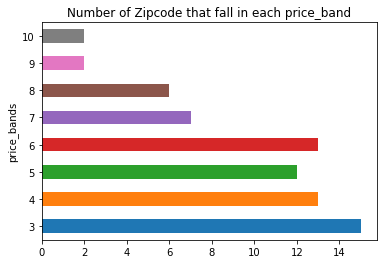

In [104]:
df_grouped_zipcode.count().plot(kind='barh')
plt.title('Number of Zipcode that fall in each price_band')

In [109]:
df_grouped_zipcode = df_zip_price_groupby.groupby('price_bands')['zipcode']
df_grouped_zipcode.value_counts()
# clearly showing us which specific zipcodes based on the median price of houses sold in that zipcode 
# and where it falls in the price band

price_bands  zipcode
3            98001      1
             98002      1
             98003      1
             98022      1
             98023      1
             98030      1
             98031      1
             98032      1
             98042      1
             98055      1
             98148      1
             98168      1
             98178      1
             98188      1
             98198      1
4            98010      1
             98038      1
             98056      1
             98058      1
             98092      1
             98106      1
             98108      1
             98118      1
             98126      1
             98133      1
             98146      1
             98155      1
             98166      1
5            98011      1
             98014      1
                       ..
6            98007      1
             98008      1
             98027      1
             98029      1
             98065      1
             98072      1
             9810

as you can see above the median of a large amount of zipcodes fall into the price band 3-6, therfore we can have a deeper analysis in each zipcode to make sure that those zipcodes do meet our needs

In [110]:
#looking at df again
df_zip_price_groupby.head()

,zipcode,price,price_bands
0,98001,260000.0,3
1,98002,235000.0,3
2,98003,267475.0,3
3,98004,1150000.0,10
4,98005,765475.0,8


Now we want to isolate only zipcodes that fall in our required price_bands

In [111]:
#isolating the zipcodes that fit our requirements
zipcode_price_band_sugg = df_zip_price_groupby.loc[(df_zip_price_groupby['price_bands'] == 3) |
                     (df_zip_price_groupby['price_bands'] == 4) | 
                     (df_zip_price_groupby['price_bands'] == 5) |
                     (df_zip_price_groupby['price_bands'] == 6)]

In [112]:
zipcode_price_band_sugg

,zipcode,price,price_bands
0,98001,260000.0,3
1,98002,235000.0,3
2,98003,267475.0,3
6,98007,555000.0,6
7,98008,545000.0,6
8,98010,359999.5,4
9,98011,470000.0,5
10,98014,415000.0,5
11,98019,401250.0,5
12,98022,280000.0,3


In [113]:
zipcode_sugg = zipcode_price_band_sugg['zipcode']
list_of_zipcode_sugg = list(zipcode_sugg)
list_of_zipcode_sugg

[98001,
 98002,
 98003,
 98007,
 98008,
 98010,
 98011,
 98014,
 98019,
 98022,
 98023,
 98024,
 98027,
 98028,
 98029,
 98030,
 98031,
 98032,
 98034,
 98038,
 98042,
 98045,
 98055,
 98056,
 98058,
 98059,
 98065,
 98070,
 98072,
 98092,
 98103,
 98106,
 98107,
 98108,
 98115,
 98116,
 98117,
 98118,
 98122,
 98125,
 98126,
 98133,
 98136,
 98144,
 98146,
 98148,
 98155,
 98166,
 98168,
 98177,
 98178,
 98188,
 98198]

In [114]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_bands
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,3
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,6
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,7
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,6


now we have a list of all the zipcodes that fit our req of falling between the price bands of 3 and 6

C:\Users\khali\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


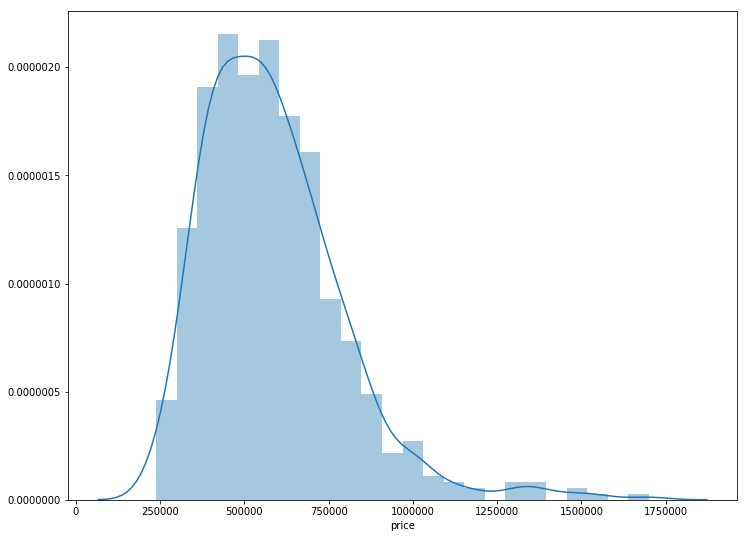

In [115]:
df_1 = df.loc[df['zipcode'] == 98103]
df_price_stats = df_1['price'].describe().apply(lambda x: format(x, 'f'))

fig, ax = plt.subplots()
fig.set_size_inches(12, 9)

sns.distplot(df_1['price'])
# a basic distplot of zipcode 98103 which you can see does fit in the price band market of 3-6 so our earlier data accuratly predicted its position

This shows us that in zipcode 98103 we can see the price is skewed at around 500,000. most of the houses in this zipcode are sold between 200,000 and  600,000


-----
# Q3. What is the relation between certain variables such as sq  footage of the house and the price?

Anaylizing the correlations in our df

In [118]:
df.corr()['price'].sort_values(ascending=False)

price            1.000000
price_bands      0.844998
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.393497
sqft_basement    0.321108
bedrooms         0.308787
lat              0.306692
waterfront       0.264306
floors           0.256804
yr_renovated     0.117855
sqft_lot         0.089876
sqft_lot15       0.082845
yr_built         0.053953
condition        0.036056
long             0.022036
id              -0.016772
zipcode         -0.053402
Name: price, dtype: float64

based on what the real estate agency asked us we will mainly compare different variable predictors with our price our value we are trying to predict

i will make regression model with different variables while trying to choose variables that are not correlated with another variable more then 0.7 as that will cause multivariable correality errors

* sqft_living vs price
* sqft_lot vs price
* grade vs price
* sqft_living vs grade
* yr_built vs grade

the first one is the predictor and the second is the predicted.
so the reason for analyzing these specific columns is that:
* prediciting the price based on different variables will help the real estate agency filter through the right houses to invest/sell and buy
* between sqft_living and grade is to see how much the grade is influenced by the sqft_living of a house, this can help them in deciding the perfect balance whilst buying/selling a house, as we saw certain grades show that custom works have been done on the place so giving the correct grade is important and sqft_living may have an effect on that
* finally the yr_built and grade shows us that there may be an inflence on the grade based on the year it was built

## sqft_living vs price

In [121]:
df.sqft_above.describe()

count    21597.000000
mean      1788.596842
std        827.759761
min        370.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64

In [125]:
X = df[['sqft_living']]
y = df[['price']]
f = 'price~sqft_living'
model = ols(formula=f, data=df_price_sqft_living).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:14:15   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

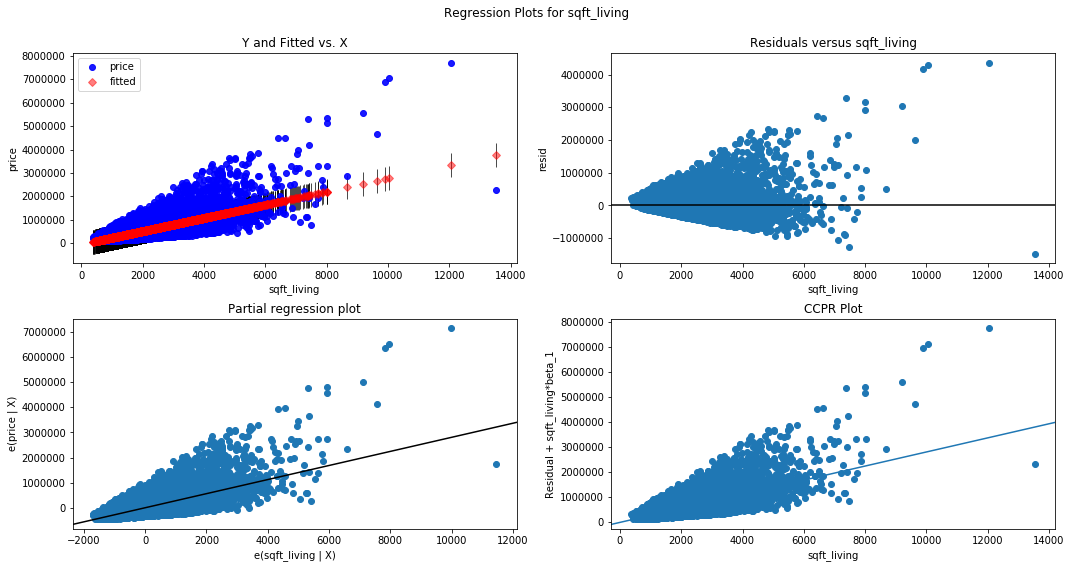

In [126]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

1. the first graph on the top left shows us the price and sqft_living have a positive realtionship and as one increases so does the other.
2. the graph on the top right each point is an observed value and the line is the mean, it shows us our models error vs the specified predictor variable
3. the bottom right is our regression model and shows the realtionship between price and sqft_living. this also takes into account the addition of other variables.
4. the graph on the right would show us the our regression model if we were to add other variables. it is identical as we have not added or changed any variables.

We can see that there is a positive correlation between price and sqft_living. as sqft_living increases we can see that price also tends to increase, which makes sense that bigger house, having more sqft_living would have a higher price

## sqft_lot vs price 

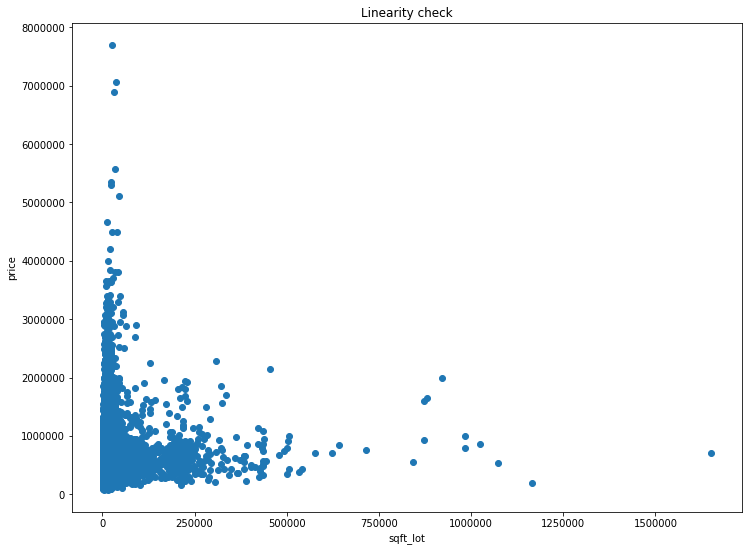

In [127]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
plt.scatter(df.sqft_lot, df.price)
plt.title("Linearity check")
plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.show()

# we can see that the linearity is very weak here

In [128]:
df_price_sqft_lot = df.loc[:, ['price', 'sqft_lot']]
f = 'price~sqft_lot'
model = ols(formula=f, data=df).fit()
model.summary()
# as you can see the R-Squared is very close to 0 to indicate to us that the line of best fit is not very good.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     175.9
Date:                Wed, 04 Dec 2019   Prob (F-statistic):           5.57e-40
Time:                        09:14:31   Log-Likelihood:            -3.0730e+05
No. Observations:               21597   AIC:                         6.146e+05
Df Residuals:                   21595   BIC:                         6.146e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.283e+05   2650.075    199.337      0.000    5.23e+05    5.33e+05
sqft_lot       0.7973      0.060     13.261      0.000       0.679       0.915
==============================================================================
Omnibus:                    19136.153   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1147708.008
Skew:                           4.030   Prob(JB):                         0.00
Kurtosis:                      37.792   Cond. No.                     4.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

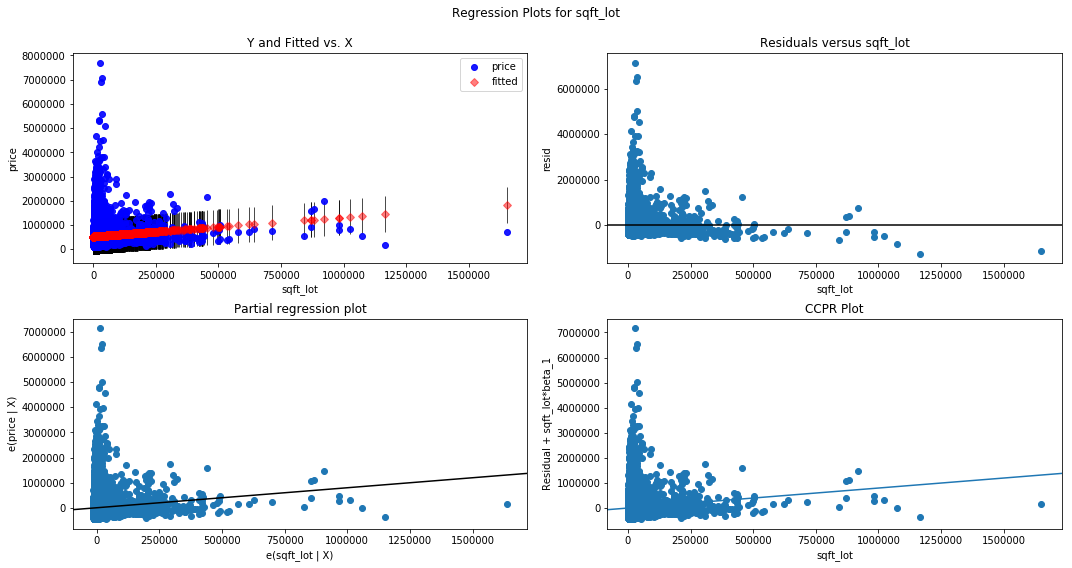

In [129]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_lot", fig=fig)
plt.show()

we can see that there is no real linearity between price and sqft_lot, it also seems that the data seems to bunch at the corner which could indicate a number of things such as while they were inputting the data they set a limit on the min or max that would be accepted.

## grade vs price

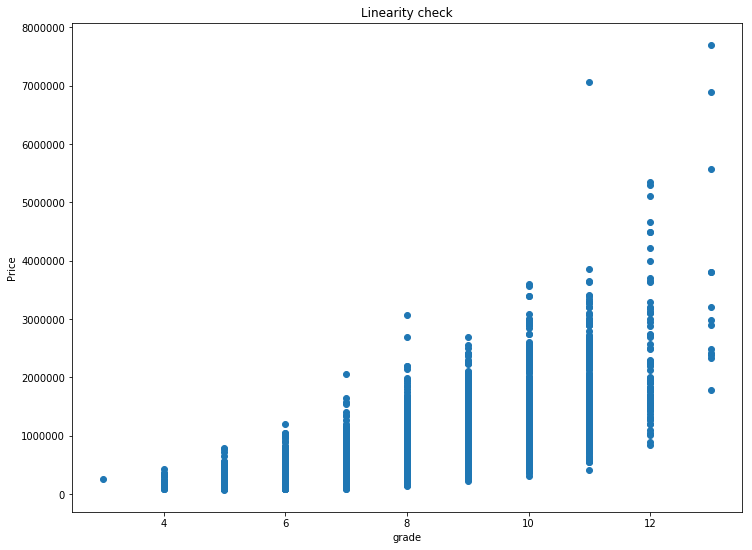

In [130]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
plt.scatter(df.grade, df.price)
plt.title("Linearity check")
plt.xlabel('grade')
plt.ylabel('Price')
plt.show()


In [139]:
df_price_sqft_lot = df.loc[:, ['grade','price']]
f = 'price~grade'
model = ols(formula=f, data=df).fit()
model.summary()
# as you can see the R-Squared is very close to 0 to indicate to us that the line of best fit is not very good.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.446
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                 1.740e+04
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:15:17   Log-Likelihood:            -3.0101e+05
No. Observations:               21597   AIC:                         6.020e+05
Df Residuals:                   21595   BIC:                         6.020e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.061e+06   1.23e+04    -86.396      0.000   -1.09e+06   -1.04e+06
grade       2.092e+05   1585.790    131.895      0.000    2.06e+05    2.12e+05
==============================================================================
Omnibus:                    19879.964   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2043898.709
Skew:                           4.081   Prob(JB):                         0.00
Kurtosis:                      49.954   Cond. No.                         52.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Basic Regression Diagnostics
----------------------------
Sample Size: 21597
Slope: 209157.776
Y-Intercept: -1061415.992
Correlation: 0.668
R-Squared: 0.446
----------------------------
Model: Y = 209157.78 * X + -1061415.99


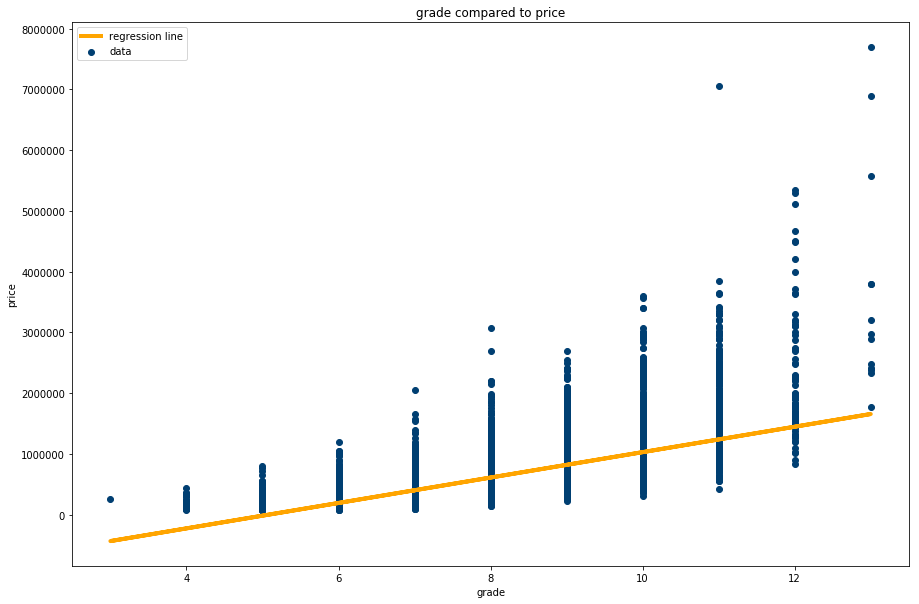

In [146]:
#the regression model for sqft_living Vs Price
def reg_basic_and_plot(X, Y, title, X_Lable, Y_Lable):
    m = calc_slope(X,Y)
    c = calc_intercept(X,Y)
    Y_pred = reg_line(m, c, X)
    r = correlation(X,Y)
    r_sqrd = r_squared(Y,Y_pred)
    print ('Basic Regression Diagnostics')
    print ('----------------------------')
    print ('Sample Size:', len(X))
    print ('Slope:', round(m, 3))
    print ('Y-Intercept:', round(c, 3))
    print ('Correlation:', r)
    print ('R-Squared:', round(r_sqrd, 3))
    print ('----------------------------')
    print ('Model: Y =',round(m, 2),'* X +', round(c, 2))
    plt.figure(figsize=(15,10))
    plt.scatter(X, Y, color='#003F72', label='data')
    plt.plot(X, Y_pred, label='regression line', linewidth=4, color='orange')
    plt.xlabel(X_Lable)
    plt.ylabel(Y_Lable)
    plt.title(title)
    plt.legend(loc=2)
    plt.show()
    return None

reg_basic_and_plot(df['grade'], df['price'], 'grade compared to price', 'grade', 'price')

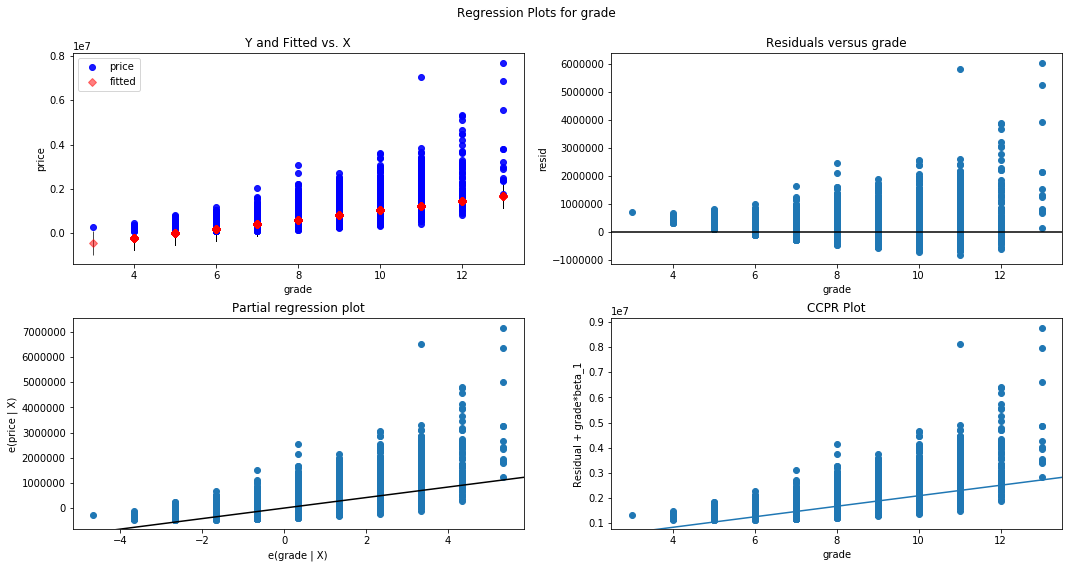

In [140]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "grade", fig=fig)
plt.show()

in this we can see that there is a positive correlation again. even though it may not look like a strong correlation, we can see that for each grade as it increases they usually have a slightly higher starting price they sell compared to their previous lower grade. so the range for house prices increases as grade increase

## sqft_living vs grade

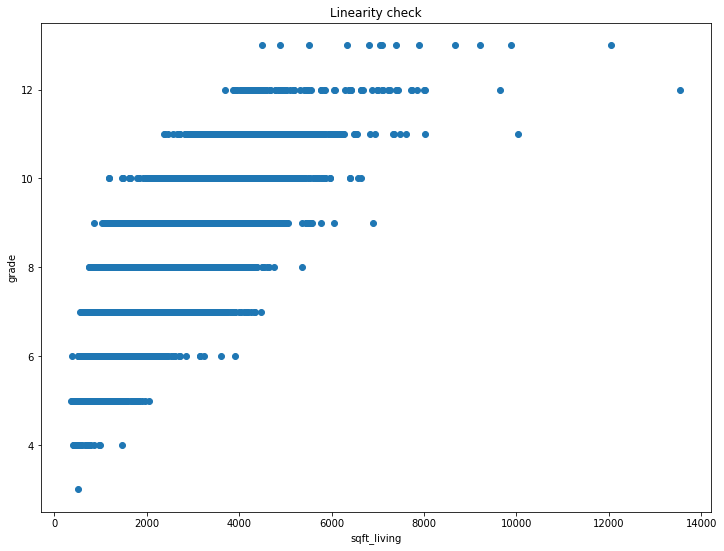

In [147]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
plt.scatter(df.sqft_living, df.grade)
plt.title("Linearity check")
plt.xlabel('sqft_living')
plt.ylabel('grade')
plt.show()

In [148]:
df_price_sqft_lot = df.loc[:, ['sqft_living','grade']]
f = 'grade~sqft_living'
model = ols(formula=f, data=df).fit()
model.summary()
# as you can see the R-Squared is very close to 0 to indicate to us that the line of best fit is not very good.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                 3.005e+04
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:19:32   Log-Likelihood:                -24679.
No. Observations:               21597   AIC:                         4.936e+04
Df Residuals:                   21595   BIC:                         4.938e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       5.6302      0.013    440.326      0.000       5.605       5.655
sqft_living     0.0010   5.62e-06    173.340      0.000       0.001       0.001
==============================================================================
Omnibus:                      386.876   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              790.457
Skew:                           0.044   Prob(JB):                    2.26e-172
Kurtosis:                       3.933   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

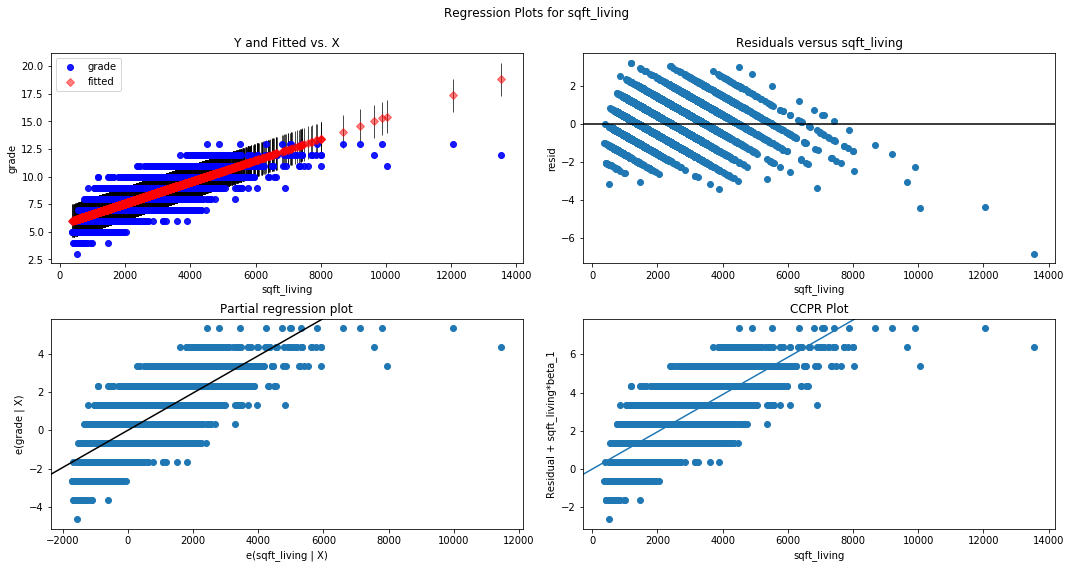

In [149]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "sqft_living", fig=fig)
plt.show()

the realtionship between grade and sqft_living is very intereting. We can see that there is a positive correlation which is much stronger then the grade vs price. we can see that as grade increases the range of sqft_living increases. so this means that bigger houses tend to get better grades

## yr_built vs grade

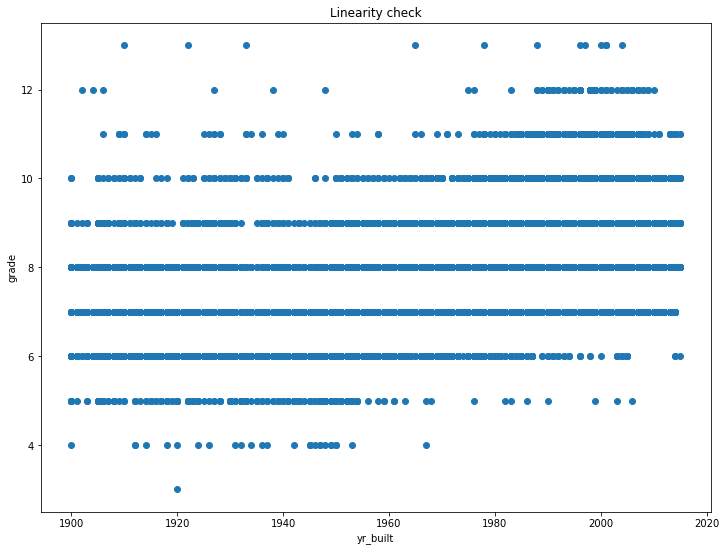

In [150]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 9)
plt.scatter(df.yr_built, df.grade)
plt.title("Linearity check")
plt.xlabel('yr_built')
plt.ylabel('grade')
plt.show()

In [151]:
df_price_sqft_lot = df.loc[:, ['yr_built','grade']]
f = 'grade~yr_built'
model = ols(formula=f, data=df).fit()
model.summary()
# as you can see the R-Squared is very close to 0 to indicate to us that the line of best fit is not very good.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  grade   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     5418.
Date:                Wed, 04 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:19:34   Log-Likelihood:                -31677.
No. Observations:               21597   AIC:                         6.336e+04
Df Residuals:                   21595   BIC:                         6.337e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.5974      0.479    -57.615      0.000     -28.536     -26.659
yr_built       0.0179      0.000     73.610      0.000       0.017       0.018
==============================================================================
Omnibus:                     3154.264   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5582.084
Skew:                           0.954   Prob(JB):                         0.00
Kurtosis:                       4.600   Cond. No.                     1.32e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

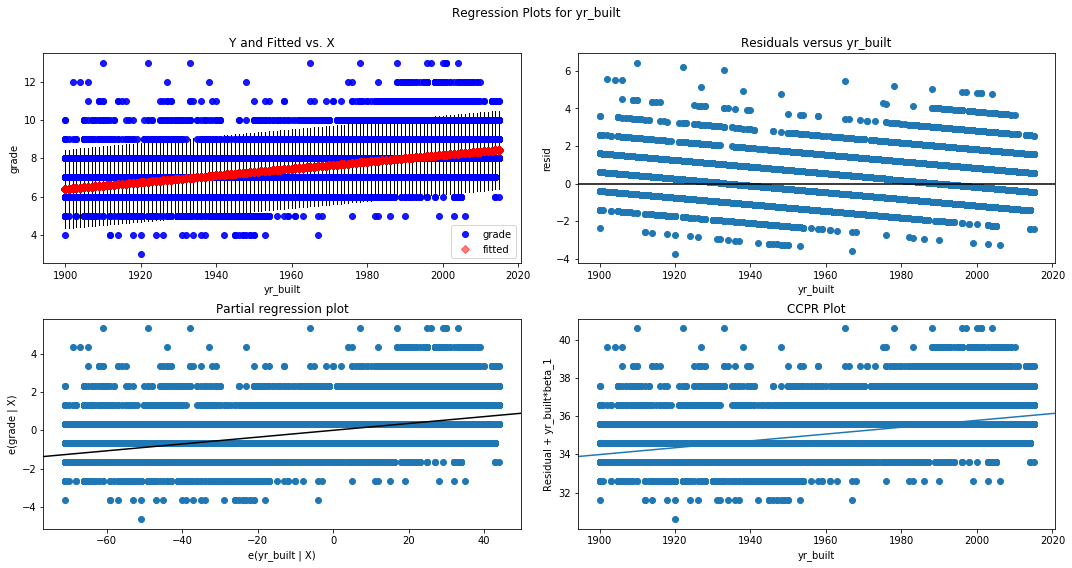

In [152]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "yr_built", fig=fig)
plt.show()

at a first glance the data is kind of all over the place. there is no real rhyme or apttern to it. something we can deduce from it is that the older houses tend to start at lower grades and only a few older houses, while it is the inverse for newer houses, theyre tend to be less houses which are new that have grades under 6 while alot more that have grade 10+ then older houses

----
# Findings

from the Questions we found out that
1. Most houses(around 67%) are sold in price bands 3-6 (200k to 599k dollars)
2. the zipcodes which fall in that price bands are more towards South of seattle
3. that price is most effected by sqft_living and that grade also has an effect on price, so they should keep these 2 variables and factors in consideration when looking/buying or selling houses

as a final note i would respond to the real-estate agency that they should try to focus on the price range market between       200,000 to 600,000 Dollars as this is where around 70% of the houses in the dataframe were sold.

on top of this after further anaylsis, we can see that this price band we suggest tend to be more towards the south of Seattle, and we analysed which zipcodes actually fall in that price range based on its median so that we can give the quantative data to help them specifically target certain zipcodes.

finally we found out in our findings in the regression models that there is a correlation between prices and sqft_living, and that there is also a very clear correlation between grade and price and sqft_living and grade. with that we can suggest the market, location and even certain factors that they should focus there efforts and resources in for the most probable potential 
